In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
X1 = np.array((2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2))
X2 = np.array((2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9))
X_unorm = np.array((X1,X2))
X_unorm

array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.2],
       [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

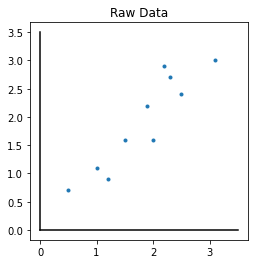

In [22]:
plt.plot(X1,X2,'.')
plt.plot((0,3.5),(0,0),'k')
plt.plot((0,0),(0,3.5),'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Raw Data')
plt.show()

In [23]:
X1_norm = X1 - X1.mean()
X2_norm = X2 - X2.mean()
X = np.array((X1_norm,X2_norm))
X

array([[ 0.68, -1.32,  0.38,  0.08,  1.28,  0.48,  0.18, -0.82, -0.32,
        -0.62],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

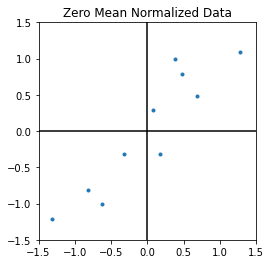

In [24]:
plt.plot(X1_norm,X2_norm,'.')
plt.plot((-1.5,1.5),(0,0),'k')
plt.plot((0,0),(-1.5,1.5),'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title('Zero Mean Normalized Data')
plt.show()

In [25]:
Sx = (1 / (X.shape[1] - 1)) * np.matmul(X,np.transpose(X))
Sx

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [26]:
# Eigen value Calculation

m = (Sx[0][0]+Sx[1][1])/2
p = Sx[0][0]*Sx[1][1] - Sx[0][1]*Sx[1][0]
lambda1 = m + np.sqrt(m**2 - p)
lambda2 = m - np.sqrt(m**2 - p)
print("lambda1: "+str(round(lambda1,2))+"\nlambda2: "+str(round(lambda2,2)))

lambda1: 1.27
lambda2: 0.05


In [27]:
# Eigen Vector Calculation

v1 = np.array((Sx[0][1] / (lambda1-Sx[0][0]),1))
v2 = np.array((Sx[0][1] / (lambda2-Sx[0][0]),1))
print("eigen vector v1:" )
print(v1)
print("\neigen vector v2:" )
print(v2)

eigen vector v1:
[0.90952068 1.        ]

eigen vector v2:
[-1.09948022  1.        ]


In [28]:
x1= np.linspace(-1.5,1.5,150)
y1= (v1[1] / v1[0])*x1
x2= np.linspace(-1.5,1.5,150)
y2= (v2[1] / v2[0])*x2

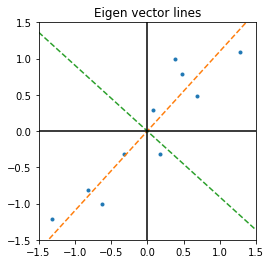

In [29]:
plt.plot(X1_norm,X2_norm,'.')
plt.plot(x1,y1,'--')
plt.plot(x2,y2,'--')
plt.plot((-1.5,1.5),(0,0),'k')
plt.plot((0,0),(-1.5,1.5),'k')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Eigen vector lines')
plt.show()

In [30]:
P = np.array((v1,v2))   # (0.6718*v1,-0.7406*v2)
Y = np.matmul(P,X)
Y

array([[ 1.10847406, -2.4105673 ,  1.33561786,  0.36276165,  2.25418647,
         1.22656993, -0.14628628, -1.55580696, -0.60104662, -1.57390282],
       [-0.25764655,  0.2413139 ,  0.57219752,  0.20204158, -0.31733469,
         0.26224949, -0.50790644,  0.09157378,  0.04183367, -0.32832226]])

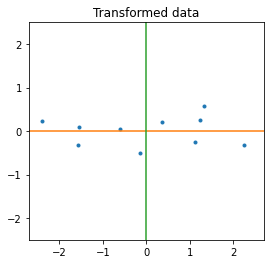

In [31]:
plt.plot(Y[0],Y[1],'.')
plt.plot((-2.7,2.7),(0,0))
plt.plot((0,0),(-2.5,2.5))
plt.xlim(-2.7,2.7)
plt.ylim(-2.5,2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Transformed data')
plt.show()

In [32]:
Sy = (1 / (Y.shape[1] - 1)) * np.matmul(Y,np.transpose(Y))
Sy

array([[2.31346812e+00, 1.90865418e-16],
       [1.90865418e-16, 1.15357923e-01]])

In [33]:
k = lambda1 / (lambda1 + lambda2)
print(str(round(k*100,2))+'% variance is explained by v1')
print(str(round((1-k)*100,2))+'% variance is explained by v2')

96.04% variance is explained by v1
3.96% variance is explained by v2


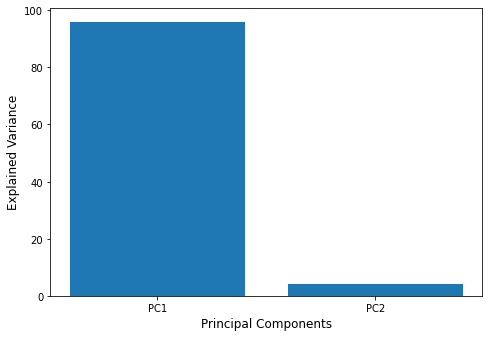

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pca = ['PC1', 'PC2']
exp_var = [k*100,(1-k)*100]
ax.bar(pca,exp_var)
ax.set_xlabel('Principal Components',fontsize='large')
ax.set_ylabel('Explained Variance',fontsize='large')
plt.show()

In [35]:
P_pca = v1
Y_pca = np.matmul(P_pca,X)
Y_pca

array([ 1.10847406, -2.4105673 ,  1.33561786,  0.36276165,  2.25418647,
        1.22656993, -0.14628628, -1.55580696, -0.60104662, -1.57390282])

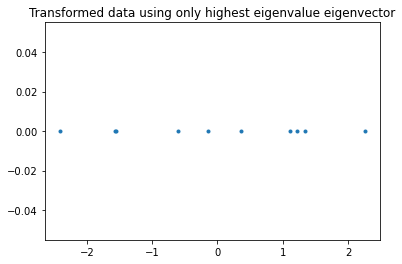

In [36]:
plt.plot(Y_pca,np.zeros((10,1)),'.')
plt.title('Transformed data using only highest eigenvalue eigenvector')
plt.show()